# Module 8: SQL Alchemy

SQL is one of the most used types of managing data storage. Being able to work with it is essential for a Data Engineer, and it helps when you can combine Python and SQL.

During this training we will go into detail about using SQL in Python. During the training we will follow the following outline:
1. SQL
2. Basic operations in SQL Alchemy
3. Creating your own tables in SQL Alchemy

Enjoy!

Run the following cell to import all necessary libraries.

In [1]:
import sqlalchemy
import requests

## Section 1: SQL (15 min)

A lot of organisations store structured data within SQL databases. For those looking to access those databases, you have to use the Structured Query Language, or SQL. SQL is a standardized programming language that is used to manage relational databases, and perform various operations on the data in them. SQL has been around since the 1970s, and it is still widely used.

There are a lot of different databases that make use of SQL, such as Microsoft SQL Server, Oracle Database, MySQL, PostgreSQL and SQLite. There can be some variations in the syntax of SQL across databases or versions, but generally they are all very similar in their use. The widespread use, and the generality of its syntax make SQL a very important skill in the toolbox of an aspiring data engineer. Luckily, as with almost anything, there is help from Python, and that is where we will focus on during this training.

But before we have a look at the Pythonic way of doing SQL, we will have a quick look at SQL. SQL databases are relational databases. And a relational database is a type of database that stores and provides access to data points that are related to one another. Relational databases are based on the relational model, an intuitive, straightforward way of representing data in tables. In a relational database, each row in the table is a record with a unique ID called the key. The columns of the table hold attributes of the data, and each record usually has a value for each attribute, making it easy to establish the relationships among data points. See the image below for an example.

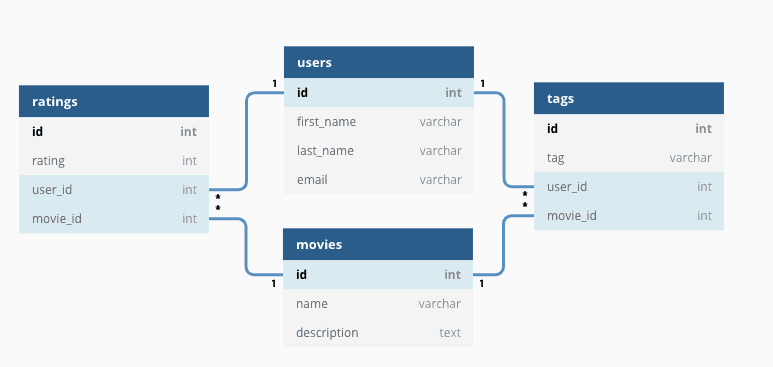

As you can see in the image above, there are multiple tables, and each table contains an attribute of the data that can link it to another table (in this case; id). Every extensive SQL database should come with at least one data model that can describe your data.

The use of SQL itself can be challenging if you don't know the syntax. For this training only a very basic understanding of the SQL syntax will be required, but it can be beneficial to have at least some insight in SQL. For this training we will mainly be using Python for our interactions with a SQL database.

To give a quick overview (or recap) of the SQL syntax, see the image (with a cheat sheet) below.

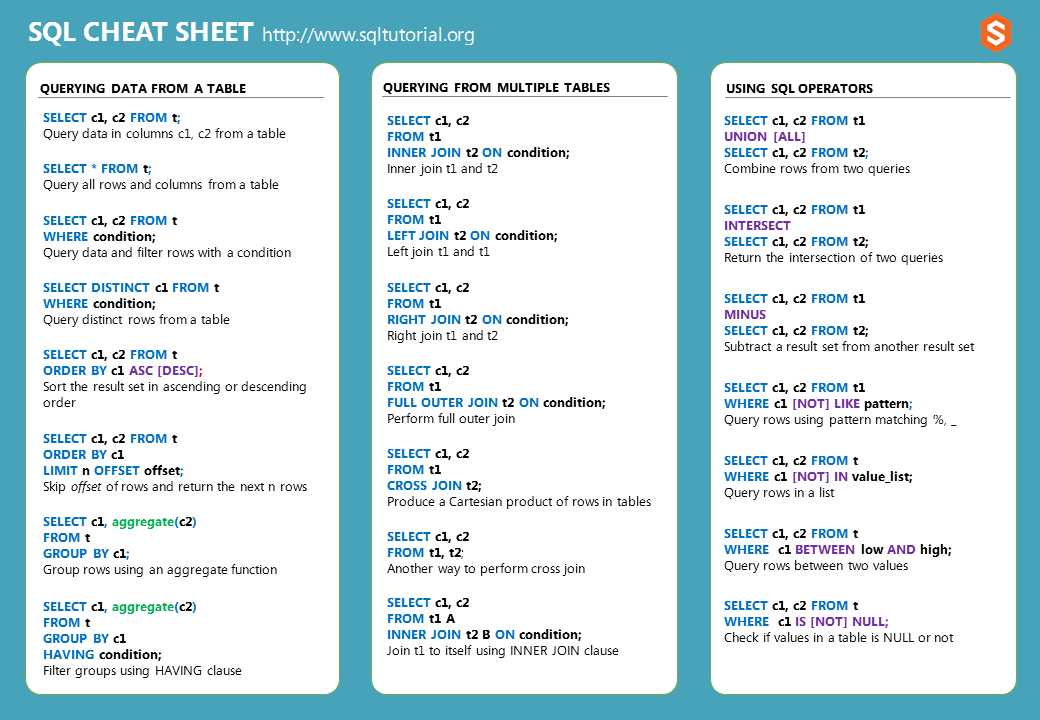

As mentioned before, in-depth knowledge of SQL is not required, but it can help when you recognize some of the syntax. Please use the cheat sheet in the image above as a reference for most of the SQL syntaxt that we'll be replicating within Python. For more information and help on the SQL syntax, see the following website: https://www.sqltutorial.org/sql-cheat-sheet/.

During this training we will be accessing, navigating and manipulating SQL databases, and we will do that using Python. For that purpose we will be using the SQL Alchemy library.

## Section 2: Basic operations in SQL Alchemy (60 min)

SQL Alchemy is one of the few Python libraries that will allow you to communicate with SQL within Python. The SQL Alchemy library allows you to use the Pythonic way of coding in order to execute SQL statements and queries. Other Python-SQL libraries such as pyodbc or sqlite3 would require you to still write valid SQL statements.

The documentation of SQL Alchemy can be found on: https://docs.sqlalchemy.org/en/14/. I find the documentation to be a little less clear than the documentation of other libraries. 

We are going to use the SQL Alchemy library for several things, including:
- Connecting to a database
- Performing (normal) SQL statements on a database
- Creating your own database
- Updating or deleting data within a database

Let's first focus on connecting to an existing database. In this directory, you can find the 'movies.db' database. It is a SQL database comprised of two tables; 'movies' and 'actors'. There is a specific set of steps you'll have to take before you can look at the data. In order to be able to work with it, we'll have to set up a connection. Using the the 'MetaData' method and the 'Table' method we can load the data in through a select statement.
See below for an example.

```python
from sqlalchemy import create_engine, select, MetaData, Table

# Set up the engine with the DataBase name.
NAME_DB = 'sqlite:///movies.db'
engine = create_engine(NAME_DB)

# Use the MetaData method in combination with the Table method.
metadata = MetaData()
table = Table('actors', metadata, autoload=True, autoload_with=engine)

# Create a selection statement on the table.
s = select(table)

# Retrieve result using the connection.
connection = engine.connect()
results = connection.execute(s)

# Print the results.
for row in results:
    print(row)
```

Let's go over the sample of code above. Naturally there is an import statement for importing the needed methods from the sqlalchemy library. After that, there is a section which creates the connection with the local 'movies.db', based on the name.

Then there is the section that sets up an instance that helps you connect to a specific table within the SQL database. For this you need to create a MetaData instance. This instance holds information on your wanted Table. It is very relevant when creating your own tables. With the MetaData instance, you can create the table variable using the 'Table' method. You can specify which table you want to access (in the example it's 'actors').

And then we can retrieve the results we want. We use the 'select' method, which allows us to make a SQL select statement. This section functions as: "SELECT * FROM actors". Using a connection to the database, we can execute the statement and retrieve the results. The results contain a generator that we can iterate over to retrieve the results.

Now it's time for you to try!

#### Assignment 1: Basic operations in SQL Alchemy 1

Print the first 10 rows of the 'movies' table in the local database 'movies.db'. 
For this to work you'll need to: create an engine for the local 'movies.db', create a table variable (also using the 'MetaData' method), create a select statement, and execute the statement to retrieve the results.

In [12]:
from sqlalchemy import create_engine, select, MetaData, Table

# Set up the engine with the DataBase name.
database_name = "sqlite:///movies.db"
engine = create_engine(database_name)

# Use the MetaData method in combination with the Table method.
metadata = MetaData()
table = Table("actors", metadata, autoload_with=engine)

# Create a selection statement on the table.
s = select(table)

# Retrieve result using the connection.
connection = engine.connect()
results = connection.execute(s)

# Print the results.
for row in results:
    print(row)

(1, 'Avatar', 'Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso')
(2, "Pirates of the Caribbean: At World's End", 'Johnny Depp', 'Orlando Bloom', 'Keira Knightley', 'Chow Yun-fat', 'Bill Nighy', 'Geoffrey Rush', 'Jack Davenport', 'Kevin McNally', 'Tom Hollander', 'Naomie Harris')
(3, 'Spectre', 'Daniel Craig', 'Christoph Waltz', 'Ralph Fiennes', 'Monica Bellucci', 'Ben Whishaw', 'Naomie Harris', 'Dave Bautista', 'Andrew Scott', 'Rory Kinnear', 'Jesper Christensen')
(4, 'The Dark Knight Rises', 'Christian Bale', 'Michael Caine', 'Gary Oldman', 'Anne Hathaway', 'Tom Hardy', 'Marion Cotillard', 'Joseph Gordon-Levitt', 'Morgan Freeman', 'Cillian Murphy', 'Juno Temple')
(5, 'John Carter', 'Taylor Kitsch', 'Lynn Collins', 'Samantha Morton', 'Willem Dafoe', 'Thomas Haden Church', 'Mark Strong', 'Dominic West', 'James Purefoy', 'Bryan Cranston', 'Polly Walker')
(6, 'Spider-M

Great. Now you have printed the first 10 rows of the table, but we have only found the values of them. And we are also interested in the column names. With the 'table' variable that you have created, you can access information about that specific table. In the documentation you can find how to access the columns of the table: https://docs.sqlalchemy.org/en/14/core/metadata.html#accessing-tables-and-columns. 

#### Assignment 2: Basic operations in SQL Alchemy 2

Print the names of the columns of the 'movies' table from the 'movies.db' database.
Use the '.columns' method (https://docs.sqlalchemy.org/en/14/core/metadata.html#accessing-tables-and-columns).

In [15]:
for column in table.columns:
    print(column)

actors.id
actors.movie_title
actors.actor_1
actors.actor_2
actors.actor_3
actors.actor_4
actors.actor_5
actors.actor_6
actors.actor_7
actors.actor_8
actors.actor_9
actors.actor_10


In [16]:
# Or...

for column in table.c:
    print(column)

actors.id
actors.movie_title
actors.actor_1
actors.actor_2
actors.actor_3
actors.actor_4
actors.actor_5
actors.actor_6
actors.actor_7
actors.actor_8
actors.actor_9
actors.actor_10


Using the information from the assignments above, we now know how the values look, and what the column names are. We can use this to our advantage in selecting information from the table.

In SQL, SELECT statements are often combined with a WHERE clause. We can do this in sqlalchemy as well (see the documentation; https://docs.sqlalchemy.org/en/14/orm/queryguide.html#select-statements).

#### Assignment 3: Basic operations in SQL Alchemy 3

Print the rows of the 'movies' table from the 'movies.db' database that have 'Quentin Tarantino' as a director.
You can use the documentation for information on how to use the WHERE clause (https://docs.sqlalchemy.org/en/14/orm/queryguide.html#select-statements). 

In [25]:
table = Table("movies", metadata, autoload_with=engine)


s = select(table).where(table.c.director_name == "Quentin Tarantino")

results = connection.execute(s)

# Print the results.
for row in results:
    print(row[1])

Django Unchained
Inglourious Basterds
The Hateful Eight
Kill Bill: Vol. 1
Kill Bill: Vol. 2
Jackie Brown
Pulp Fiction
Reservoir Dogs


#### Assignment 4: Basic operations in SQL Alchemy 4

Print the rows of the 'movies' table from the 'movies.db' database that have a duration of more than 200 minutes.
You can use the documentation for information on how to use the WHERE clause (https://docs.sqlalchemy.org/en/14/orm/queryguide.html#select-statements). 

In [31]:
s = select(table).where(table.c.duration > 200)

results = connection.execute(s)

# Print the results.
for row in results:
    print(row[1])

The Lord of the Rings: The Return of the King
Gods and Generals
Heaven's Gate
Malcolm X
Once Upon a Time in America
Gettysburg
Hamlet
Lawrence of Arabia
The Godfather: Part II
It's a Mad, Mad, Mad, Mad World
Gone with the Wind
Seven Samurai


Another nice features is using multiple WHERE clauses within one SELECT statement. We can do this using the 'and_' operator. See the documentation for more information: https://docs.sqlalchemy.org/en/14/core/sqlelement.html#sqlalchemy.sql.expression.and_.

#### Assignment 5: Basic operations in SQL Alchemy 5

Print the movie names of the 'movies' table from the 'movies.db' database that meet the following conditions.
The movies have more than 10 oscar nominations, have a duration of less than 200 minutes, and have won at least one oscar.

In [60]:
from sqlalchemy import and_

s = select(table.c.movie_title).where(
    and_(table.c.duration < 200, table.c.oscar_wins >= 1, table.c.oscar_nominees > 10),
)

connection = engine.connect()
results = connection.execute(s)

# Print the results.
for row in results:
    print(row[0])

Titanic
Hugo
The Curious Case of Benjamin Button
The Revenant
Life of Pi
The Aviator
The Lord of the Rings: The Fellowship of the Ring
Gladiator
Saving Private Ryan
Lincoln
Forrest Gump
The English Patient
Out of Africa
Chicago
A Passage to India
Shakespeare in Love
Schindler's List
Dances with Wolves
Amadeus
My Fair Lady
The King's Speech
Oliver!
The Godfather
Mary Poppins
West Side Story
On the Waterfront


#### Assignment 6: Basic operations in SQL Alchemy 6

Print the movie names, number of oscar nominees, number of oscar wins, and the imdb score of the 'movies' table from the 'movies.db' database that meet the following conditions.

The movies have zero oscar wins and zero oscar nominations. Also, the movies have a imdb score higher than 9.

In [58]:
for column in table.c:
    print(column)

movies.id
movies.movie_title
movies.director_name
movies.summary
movies.genres
movies.release_data
movies.duration
movies.budget
movies.opening_weekend_usa
movies.gross_usa
movies.gross_worldwide
movies.imdb_score
movies.num_critic_for_reviews
movies.num_voted_users
movies.metascore
movies.oscar_wins
movies.oscar_nominees


In [86]:
from sqlalchemy import and_

s = select(
    table.c.movie_title, table.c.oscar_nominees, table.c.oscar_wins, table.c.imdb_score
).where(
    and_(
        table.c.imdb_score > 8.5,
        table.c.imdb_score != "",
        table.c.oscar_wins == 0,
        table.c.oscar_nominees == 0,
    ),
)

results = connection.execute(s)

# Print the results.
for row in results:
    # imdb_score = "UNKNOWN" if row.imdb_score == "" else row.imdb_score
    print(
        f"{row.movie_title} got {row.oscar_nominees} nominees and won {row.oscar_wins} with and IMDB score of {imdb_score}"
    )

Interstellar got 0 nominees and won 0 with and IMDB score of 8.9
Fight Club got 0 nominees and won 0 with and IMDB score of 8.9
Se7en got 0 nominees and won 0 with and IMDB score of 8.9
Spirited Away got 0 nominees and won 0 with and IMDB score of 8.9
Pulp Fiction got 0 nominees and won 0 with and IMDB score of 8.9
The Good, the Bad and the Ugly got 0 nominees and won 0 with and IMDB score of 8.9


In the 'movies.db' database, we have two tables; the 'movies', and the 'actors. Up until now we have focused on the 'movies' table. But in theory we could join the tables, as they have a common identifier.

In SQL we have the JOIN statement with which we can join two tables based on a common identifier. In sqlalchemy we can use several methods, see one of them in the example below.

```python
from sqlalchemy import join

# We have created two tables, called table_1 and table_2. Both have the id column.
s = select(table_1.c.movie_title, table_1.c.movie_title).join(table_2, table_1.c.ID==table_2.c.ID)
```

In the code example above we can see the 'join' method. Using the select statement and the join statement, we can retrieve information from two tables. As you can see in the '.join' method, we are naming the table we want to join, and the two common identifiers.

Before we can join both of the tables, we need to know the column names of the 'actors' table.

#### Assignment 7: Basic operations in SQL Alchemy 7

Create a new table for the 'actors' table from the 'movies.db' database.
Then print all the column names.

In [88]:
# Use the MetaData method in combination with the Table method.
table = Table("actors", metadata, autoload_with=engine)

for col in table.columns:
    print(col)

actors.id
actors.movie_title
actors.actor_1
actors.actor_2
actors.actor_3
actors.actor_4
actors.actor_5
actors.actor_6
actors.actor_7
actors.actor_8
actors.actor_9
actors.actor_10


#### Assignment 8: Basic operations in SQL Alchemy 8

Print the movie title from both tables, and all the actor columns.
Use a '.join' statement.

In [95]:
# from sqlalchemy import join

actors_table = Table("actors", metadata, autoload_with=engine)
movies_table = Table("movies", metadata, autoload_with=engine)

s = select(actors_table.c.movie_title, movies_table).join(
    movies_table, actors_table.c.id == movies_table.c.id
)

# Retrieve result using the connection.
connection = engine.connect()
results = connection.execute(s)

# Print the results.
for row in results:
    print(row)

('Avatar', 1, 'Avatar', 'James Cameron', 'A paraplegic marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.', 'Action | Adventure | Fantasy | Sci-Fi', '2009-12-17', 162, 237000000.0, 77025481.0, 760507625.0, 2787965087.0, 7.8, 727.0, 1038709.0, 83, 3, 9)
("Pirates of the Caribbean: At World's End", 2, "Pirates of the Caribbean: At World's End", 'Gore Verbinski', 'Captain Barbossa, Will Turner and Elizabeth Swann must sail off the edge of the map, navigate treachery and betrayal, find Jack Sparrow, and make their final alliances for one last decisive battle.', 'Action | Adventure | Fantasy', '2007-05-23', 169, 300000000.0, 139802190.0, 309420425.0, 963420425.0, 7.1, 322.0, 554187.0, 50, 0, 2)
('Spectre', 3, 'Spectre', 'Sam Mendes', "A cryptic message from 007's past sends him pitted against a mysterious terrorist organization called Spectre, and learns of its involvement in previous events of h

Great. Now let's combine it with what we have learned up until now.

#### Assignment 9: Basic operations in SQL Alchemy 9

Print the movie title from the 'movies' table, and all the actor columns from the 'actors' table.
Only rows that have 'Quentin Tarantino' as a director, and that have 'Jamie Foxx' as the first actor.
Use a '.join' statement.

In [104]:
s = (
    select(
        movies_table.c.movie_title,
        actors_table.c.actor_1,
        actors_table.c.actor_2,
        actors_table.c.actor_3,
        actors_table.c.actor_4,
        actors_table.c.actor_5,
        actors_table.c.actor_6,
        actors_table.c.actor_7,
        actors_table.c.actor_8,
        actors_table.c.actor_9,
        actors_table.c.actor_10,
    )
    .join(movies_table, actors_table.c.id == movies_table.c.id)
    .where(
        and_(movies_table.c.director_name == "Quentin Tarantino"),
        actors_table.c.actor_1 == "Jamie Foxx",
    )
)

# Retrieve result using the connection.
results = connection.execute(s)

# Print the results.
for i, row in enumerate(results):
    print(row)

('Django Unchained', 'Jamie Foxx', 'Christoph Waltz', 'Leonardo DiCaprio', 'Kerry Washington', 'Samuel L. Jackson', 'Walton Goggins', 'Dennis Christopher', 'James Remar', 'David Steen', 'Dana Gourrier')


## Section 3: Creating your own tables in SQL Alchemy (45 min)

In the section above, we have looked at operations on an existing table. But what if we want to create our own tables? Sometimes, in a pipeline, we would want to be able to automatically add our own information and tables to our database. Again, SQL alchemy can provide the tools to help us with this.

During this section, we will be creating and filling our own database. We will create a table containing information on countries. We will retrieve this information from the countries API: https://restcountries.com/v2/all.

Before we get started with the creation of our own database with our own table, let's have a look at the data that we want to insert. The code below retrieves the information from the countries API.

In [105]:
import requests

# Retrieve all the countries.
URL = "https://restcountries.com/v2/all"
result = requests.get(URL).json()

print(result[0])

{'name': 'Afghanistan', 'topLevelDomain': ['.af'], 'alpha2Code': 'AF', 'alpha3Code': 'AFG', 'callingCodes': ['93'], 'capital': 'Kabul', 'altSpellings': ['AF', 'Afġānistān'], 'subregion': 'Southern Asia', 'region': 'Asia', 'population': 40218234, 'latlng': [33.0, 65.0], 'demonym': 'Afghan', 'area': 652230.0, 'timezones': ['UTC+04:30'], 'borders': ['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN'], 'nativeName': 'افغانستان', 'numericCode': '004', 'flags': {'svg': 'https://upload.wikimedia.org/wikipedia/commons/5/5c/Flag_of_the_Taliban.svg', 'png': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/320px-Flag_of_the_Taliban.svg.png'}, 'currencies': [{'code': 'AFN', 'name': 'Afghan afghani', 'symbol': '؋'}], 'languages': [{'iso639_1': 'ps', 'iso639_2': 'pus', 'name': 'Pashto', 'nativeName': 'پښتو'}, {'iso639_1': 'uz', 'iso639_2': 'uzb', 'name': 'Uzbek', 'nativeName': 'Oʻzbek'}, {'iso639_1': 'tk', 'iso639_2': 'tuk', 'name': 'Turkmen', 'nativeName': 'Türkmen'}], 'tran

That's a lot of information. Let's trim it down a little before we start adding to our own database.

In [106]:
countries = []
for country in result:
    country_dict = {
        "country_name": country["name"],
        "alpha3Code": country["alpha3Code"],
        "subregion": country["subregion"],
        "region": country["region"],
    }
    if "capital" in country.keys():
        country_dict["capital"] = country["capital"]
    else:
        country_dict["capital"] = "NO_CAPITAL"

    countries.append(country_dict)

print(countries[0])

{'country_name': 'Afghanistan', 'alpha3Code': 'AFG', 'subregion': 'Southern Asia', 'region': 'Asia', 'capital': 'Kabul'}


Well, that's more clear. Now that we have an overview of the data we are going to store, let's move on to the sqlalchemy stuff.

Just like before, we have to create an engine that will allow us to create a SQL database.

#### Assignment 10: Creating your own tables in SQL Alchemy 1

Create a sqlalchemy engine with the name: 'countries.db'.

In [115]:
# Set up the engine with the DataBase name.
NAME_DB = "sqlite:///countries_2.db"
engine = create_engine(NAME_DB)

With the created engine, we want to create a Table. Before we can start with filling the table in our database, we first need to define it, and set the columns we want to fill in. See the example below, or check the documentation for more information (https://docs.sqlalchemy.org/en/14/core/metadata.html).

```python
from sqlalchemy import Table, Column, Integer, String, MetaData

metadata = MetaData()

custom_table = Table('new_table', metadata,
                     Column('id', Integer, primary_key=True),
                     Column('book_name', String),
                     Column('author', String))

metadata.drop_all(engine)
metadata.create_all(engine)
```

Let's walk through the example above. We initiate a MetaData object. Then we create the Table object (we have used this before, but now we are filling it with information). In the Table object, we give a table name and we pass the columns that we want to create. After that, we use the engine to drop everything (clear the database), and create table within the database.

#### Assignment 11: Creating your own tables in SQL Alchemy 2

Create a Table object with the following column names: country_name, alpha3Code, subregion, region, capital. 
Each column should be off the type; String. 
You also want to create an ID column. 
Give the table the following name: 'countries'.

In [133]:
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table

# Use the MetaData method in combination with the Table method.
metadata = MetaData()

countries_table = Table(
    "countries",
    metadata,
    Column("id", Integer, primary_key=True),
    Column("country_name", String),
    Column("alpha3Code", String),
    Column("subregion", String),
    Column("region", String),
    Column("capital", String),
)

metadata.drop_all(engine)
metadata.create_all(engine)

Now that we set up the Table object, let's fill it with our data. Remember the countries that we retrieved from the API? Let's fill the 'countries' table with that data. 

We can fill the table one at the time, using the following code.

```python
insert = custom_table.insert().values({'book_name': 'The Hobbit', 'author': 'J.R.R. Tolkien'})

with engine.connect() as connection:
    connection.execute(insert)
```

We can also fill the table in one go, with a list of values. See the code below for an example.

```python
insert = custom_table.insert().values([{'book_name': 'The Hobbit', 'author': 'J.R.R. Tolkien'},
                                       {'book_name': 'Iliad', 'author': 'Homer'}])

with engine.connect() as connection:
    connection.execute(insert)
```

Depending on what you need, you can select the method that is most applicable.

#### Assignment 12: Creating your own tables in SQL Alchemy 3

Fill the 'countries' database with the information from the 'countries' variable (this should contain a list of countries in the form of dictionaries).

In [136]:
insert = countries_table.insert().values(countries)

with engine.connect() as connection:
    connection.execute(insert)
    connection.commit()

#### Assignment 13: Creating your own tables in SQL Alchemy 4

Check your work by printing all country names and their capitals. Use a select statement.

In [137]:
s = select(countries_table.c.country_name, countries_table.c.capital)

with engine.connect() as connection:
    results = connection.execute(s)

# Print the results.
for i, row in enumerate(results):
    print(row)

('Afghanistan', 'Kabul')
('Åland Islands', 'Mariehamn')
('Albania', 'Tirana')
('Algeria', 'Algiers')
('American Samoa', 'Pago Pago')
('Andorra', 'Andorra la Vella')
('Angola', 'Luanda')
('Anguilla', 'The Valley')
('Antarctica', 'NO_CAPITAL')
('Antigua and Barbuda', "Saint John's")
('Argentina', 'Buenos Aires')
('Armenia', 'Yerevan')
('Aruba', 'Oranjestad')
('Australia', 'Canberra')
('Austria', 'Vienna')
('Azerbaijan', 'Baku')
('Bahamas', 'Nassau')
('Bahrain', 'Manama')
('Bangladesh', 'Dhaka')
('Barbados', 'Bridgetown')
('Belarus', 'Minsk')
('Belgium', 'Brussels')
('Belize', 'Belmopan')
('Benin', 'Porto-Novo')
('Bermuda', 'Hamilton')
('Bhutan', 'Thimphu')
('Bolivia (Plurinational State of)', 'Sucre')
('Bonaire, Sint Eustatius and Saba', 'Kralendijk')
('Bosnia and Herzegovina', 'Sarajevo')
('Botswana', 'Gaborone')
('Bouvet Island', 'NO_CAPITAL')
('Brazil', 'Brasília')
('British Indian Ocean Territory', 'Diego Garcia')
('United States Minor Outlying Islands', 'NO_CAPITAL')
('Virgin Island

#### Assignment 14: Creating your own tables in SQL Alchemy 5

Now it's time to be creative. Make up a 'fake' country, and add them it the 'countries' table. 

In [129]:
countries[0]

{'country_name': 'Afghanistan',
 'alpha3Code': 'AFG',
 'subregion': 'Southern Asia',
 'region': 'Asia',
 'capital': 'Kabul'}

In [141]:
insert = countries_table.insert().values(
    {
        "country_name": "City-state of Leidschendam",
        "alpha3Code": "CSL",
        "subregion": "Netherlands",
        "region": "Europe",
        "capital": "De Sluisjes",
    }
)

with engine.connect() as connection:
    connection.execute(insert)
    connection.commit()

#### Assignment 15: Creating your own tables in SQL Alchemy 6

Check your work by printing only your fake country. Use a select statement.

In [142]:
s = select(countries_table).where(
    countries_table.c.country_name == "City-state of Leidschendam"
)

connection = engine.connect()
results = connection.execute(s)

# Print the results.
for i, row in enumerate(results):
    print(row)

(251, 'City-state of Leidschendam', 'CSL', 'Netherlands', 'Europe', 'De Sluisjes')


In [143]:
s = select(countries_table).where(countries_table.c.region == "Europe")

connection = engine.connect()
results = connection.execute(s)

# Print the results.
for i, row in enumerate(results):
    print(row)

(2, 'Åland Islands', 'ALA', 'Northern Europe', 'Europe', 'Mariehamn')
(3, 'Albania', 'ALB', 'Southern Europe', 'Europe', 'Tirana')
(6, 'Andorra', 'AND', 'Southern Europe', 'Europe', 'Andorra la Vella')
(15, 'Austria', 'AUT', 'Central Europe', 'Europe', 'Vienna')
(21, 'Belarus', 'BLR', 'Eastern Europe', 'Europe', 'Minsk')
(22, 'Belgium', 'BEL', 'Western Europe', 'Europe', 'Brussels')
(29, 'Bosnia and Herzegovina', 'BIH', 'Southern Europe', 'Europe', 'Sarajevo')
(38, 'Bulgaria', 'BGR', 'Eastern Europe', 'Europe', 'Sofia')
(58, 'Croatia', 'HRV', 'Southern Europe', 'Europe', 'Zagreb')
(61, 'Cyprus', 'CYP', 'Southern Europe', 'Europe', 'Nicosia')
(62, 'Czech Republic', 'CZE', 'Central Europe', 'Europe', 'Prague')
(63, 'Denmark', 'DNK', 'Northern Europe', 'Europe', 'Copenhagen')
(72, 'Estonia', 'EST', 'Northern Europe', 'Europe', 'Tallinn')
(75, 'Faroe Islands', 'FRO', 'Northern Europe', 'Europe', 'Tórshavn')
(77, 'Finland', 'FIN', 'Northern Europe', 'Europe', 'Helsinki')
(78, 'France', 'FRA